# <span style="color:#c83349; font-family: Trebuchet MS; font-size: 50px; font-weight: bold;">Heart Diseases</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
heart = pd.read_csv(r"C:\Users\rahim\Desktop\DSA 25\PYTHON\PYTHON 9\heart_disease_dataset.csv",delimiter=';')
df = heart.copy()

# <span style="color:#c83349; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Data Preparation</span>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
df.shape

(303, 14)

In [7]:
# No null values
df.isnull().sum().sum()

0

In [8]:
# There is non imbalance problem
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
# Duplicate check
len(df) == len(df.drop_duplicates())

False

In [10]:
# Dropping duplicates
df = df.drop_duplicates()

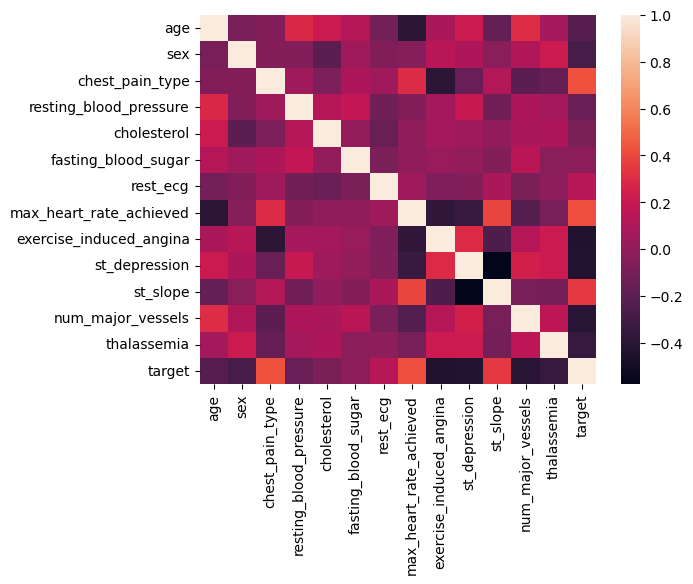

In [11]:
# No multicolinearity observed
sns.heatmap(df.corr())
plt.show()

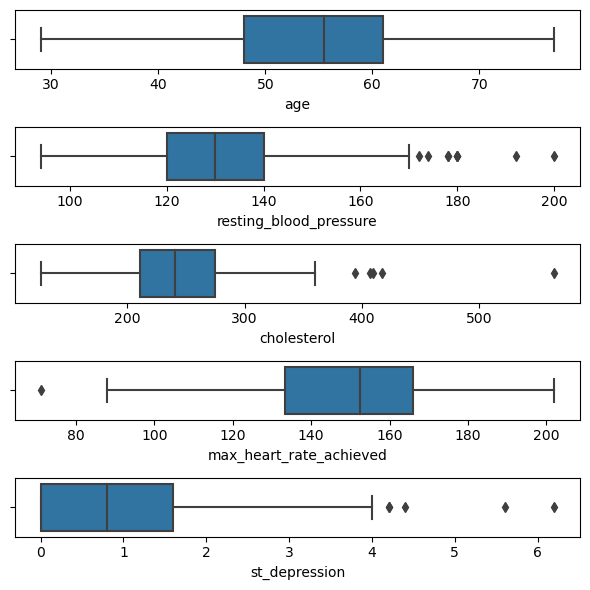

In [12]:
# Outliers detection
fig, axes = plt.subplots(nrows=5,figsize=(6,6))
sns.boxplot(ax=axes[0],x=df['age'],data=df)
sns.boxplot(ax=axes[1],x=df['resting_blood_pressure'],data=df)
sns.boxplot(ax=axes[2],x=df['cholesterol'],data=df)
sns.boxplot(ax=axes[3],x=df['max_heart_rate_achieved'],data=df)
sns.boxplot(ax=axes[4],x=df['st_depression'],data=df)
plt.tight_layout()

In [13]:
# Outliers treatment 
columns = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']

lower_list = []
upper_list = []

for col in columns:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    lower_list.append(lower)
    upper_list.append(upper)

for lower,upper,col in zip(lower_list,upper_list,columns):
    df = df[(df[col]>lower) & (df[col]<upper)]

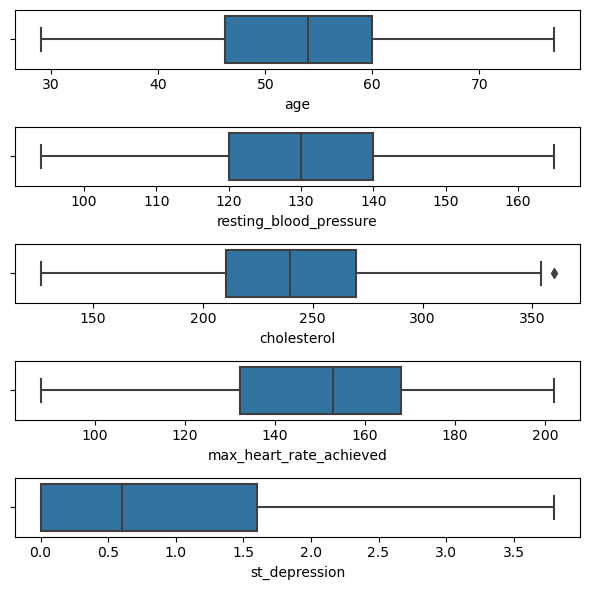

In [14]:
# Outliers have been removed
fig, axes = plt.subplots(nrows=5,figsize=(6,6))
sns.boxplot(ax=axes[0],x=df['age'],data=df)
sns.boxplot(ax=axes[1],x=df['resting_blood_pressure'],data=df)
sns.boxplot(ax=axes[2],x=df['cholesterol'],data=df)
sns.boxplot(ax=axes[3],x=df['max_heart_rate_achieved'],data=df)
sns.boxplot(ax=axes[4],x=df['st_depression'],data=df)
plt.tight_layout()

In [15]:
df.shape

(278, 14)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Splitting into features and targets
X=df.iloc[:,:-1]
y =df.iloc[:,-1]

In [18]:
# Train test split
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=101,
                                                     shuffle=True
                                                    )

In [19]:
# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Converting y_train and y_test to numpy arrays
y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

# <span style="color:#c83349; font-family: Trebuchet MS; font-size: 50px; font-weight: bold;">Modeling</span>

# <span style="color:#c83349; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Neural Network from Scratch</span>

In [45]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

# Derivative of Sigmoid Activation Function
def sigmoid_derivative(x):
    return x * (1.0 - x)

# Rectified Linear Unit (ReLU) Activation Function
def relu(x):
    return np.maximum(x, 0)

# Derivative of ReLU Activation Function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Cross-Entropy Loss Function
# Used for classification problems to measure the difference between predicted and true labels
def cross_entropy_loss(y_true, y_pred):
    # Calculate the cross-entropy loss over the dataset and average it
    return np.sum(-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))) / len(y_true)

# Derivative of Cross-Entropy Loss Function
# Used in backpropagation to update the model's weights during training
def cross_entropy_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred))


class NeuralNetwork:
    def __init__(self, x, y):
        # Initialize the neural network with input data x and corresponding labels y
        
        # Defining the input data
        self.IN = x
        
        # Initializing weights and biases for the neural network layers
        
        # Defining the weights applied at the first hidden layer.
        # This matrix has size (number of input features, number of neurons in the first hidden layer).
        self.W1 = np.random.rand(self.IN.shape[1], 6)
        
        # Defining the weights applied at the second hidden layer.
        # This matrix has shape (number of neurons in the first hidden layer, number of neurons in the second hidden layer).
        self.W2 = np.random.rand(6, 4)
        
        # Defining the weights applied at the output layer.
        # It has shape (number of neurons in the second hidden layer, number of output neurons).
        self.W3 = np.random.rand(4, 1)
        
        # Defining the biases for each layer
        
        # Bias for the first hidden layer.
        # Shape: (1, number of neurons in the first hidden layer).
        self.b1 = np.random.rand(1, 6)
        
        # Bias for the second hidden layer.
        # Shape: (1, number of neurons in the second hidden layer).
        self.b2 = np.random.rand(1, 4)
        
        # Bias for the output layer.
        # Shape: (1, number of output neurons).
        self.b3 = np.random.rand(1, 1)
        
        # Store the ground truth labels
        self.y = y
        
        # Set the learning rate for gradient descent
        self.learning_rate = 0.01


    def feed_forward(self):
        
        # Calculate the outputs of the first hidden layer using ReLU activation
        # Apply the dot product of input and weights, then add the bias, and apply ReLU activation
        self.HIDDEN_LAYER_1 = relu(np.dot(self.IN, self.W1) + self.b1)

        # Calculate the outputs of the second hidden layer using Sigmoid activation
        # Apply the dot product of first hidden layer outputs and weights, add bias, and apply Sigmoid activation
        self.HIDDEN_LAYER_2 = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2) + self.b2)

        # Calculate the final output of the neural network using Sigmoid activation
        # Apply the dot product of second hidden layer outputs and weights, add bias, and apply Sigmoid activation
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_2, self.W3) + self.b3)


    def back_propagate(self):
        # Perform backpropagation to update weights and biases using gradient descent

        # Calculate the derivatives of the loss function with respect to weights and biases

        # Derivatives of output layer weights and biases
        d_W3 = np.dot(self.HIDDEN_LAYER_2.T, (cross_entropy_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        d_b3 = np.dot(np.ones(self.IN.shape[0]).reshape(1, self.IN.shape[0]), (cross_entropy_derivative(self.y, self.output) * sigmoid_derivative(self.output)))

        # Derivatives of second hidden layer weights and biases
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (np.dot(cross_entropy_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)))
        d_b2 = np.dot(np.ones(self.IN.shape[0]).reshape(1, self.IN.shape[0]), (np.dot(cross_entropy_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)))

        # Derivatives of first hidden layer weights and biases
        d_W1 = np.dot(self.IN.T, (np.dot((np.dot(cross_entropy_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)), self.W2.T) * relu_derivative(np.dot(self.IN, self.W1) + self.b1)))
        d_b1 = np.dot(np.ones(self.IN.shape[0]).reshape(1, self.IN.shape[0]), (np.dot((np.dot(cross_entropy_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)), self.W2.T) * relu_derivative(np.dot(self.IN, self.W1) + self.b1)))

        # Update the weights and biases using the calculated derivatives and the learning rate
        self.W1 -= self.learning_rate * d_W1
        self.W2 -= self.learning_rate * d_W2
        self.W3 -= self.learning_rate * d_W3
        self.b1 -= self.learning_rate * d_b1
        self.b2 -= self.learning_rate * d_b2
        self.b3 -= self.learning_rate * d_b3



    def batch_splitter(self, features, labels, batch_size):
        # Shuffle the data using random permutations
        shuffled_indices = np.random.permutation(features.shape[0])
        features = features[shuffled_indices]
        labels = labels[shuffled_indices]

        # Split the shuffled data into batches
        batch = []
        batches = []
        batch_splits = []
        num_of_batches = features.shape[0] // batch_size
        num = 1

        # Calculate the indices where batches should be split
        for i in range(1, num_of_batches + 1):
            batch_splits.append(i * batch_size)

        # Iterate through the data and create batches
        for f, l in zip(features, labels):
            batch.append([f, l])
            # If the current index is a batch split point or the last data point
            if num in batch_splits or num == features.shape[0]:
                x = []
                y = []
                # Extract features and labels from the batch
                for i in batch:
                    x.append(i[0])
                    y.append(i[1])
                x = np.array(x)
                y = np.array(y)
                batches.append([x, y])
                batch = []  # Reset the batch for the next iteration
            num += 1

        return batches


    def train(self, epochs, learning_rate, batch_size):
        # Set the learning rate and store features and labels
        self.learning_rate = learning_rate
        self.features = self.IN
        self.labels = self.y

        # Iterate through epochs
        for n, epoch in enumerate(range(epochs)):
            # Split the data into batches
            batches = self.batch_splitter(self.features, self.labels, batch_size)
            losses = []

            # Iterate through each batch
            for batch in batches:
                # Set current batch as input features and labels
                self.IN = batch[0]
                self.y = batch[1]

                # Perform forward and backward propagation
                self.feed_forward()
                self.back_propagate()

                # Calculate and store the loss for this batch
                loss = cross_entropy_loss(self.y, self.output)
                losses.append(loss)

            # Calculate and print the average loss for this epoch
            avg_loss = sum(losses) / len(batches)
            print(f'Epoch {n+1}. Average batch cross entropy: {avg_loss}')


    def predict(self, X_test):
        # Set the input features for prediction
        self.IN = X_test

        # Perform forward propagation to get the predicted output
        self.feed_forward()

        # Return the predicted output
        return self.output

In [22]:
model = NeuralNetwork(X_train,y_train)

In [23]:
model.train(epochs=100,learning_rate=0.05,batch_size=32)

Epoch 1. Average batch cross entropy: 0.680684299749073
Epoch 2. Average batch cross entropy: 0.7933931068976202
Epoch 3. Average batch cross entropy: 0.7406016887846893
Epoch 4. Average batch cross entropy: 0.7831135840820392
Epoch 5. Average batch cross entropy: 0.720837234885254
Epoch 6. Average batch cross entropy: 0.9206315667457099
Epoch 7. Average batch cross entropy: 0.7400696070053927
Epoch 8. Average batch cross entropy: 0.7737865256974619
Epoch 9. Average batch cross entropy: 0.7443347035134665
Epoch 10. Average batch cross entropy: 0.7368940936976706
Epoch 11. Average batch cross entropy: 0.7250624331449955
Epoch 12. Average batch cross entropy: 0.8793451016155959
Epoch 13. Average batch cross entropy: 0.7518988168590105
Epoch 14. Average batch cross entropy: 0.8426759607518066
Epoch 15. Average batch cross entropy: 0.7536868248010398
Epoch 16. Average batch cross entropy: 0.7449441214642157
Epoch 17. Average batch cross entropy: 0.7895821485343205
Epoch 18. Average batch c

In [24]:
y_pred = np.round(model.predict(X_test))

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.8928571428571429

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test,y_pred))

[[26  3]
 [ 3 24]]


In [29]:
# EXCELLENT RESULTS
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.89      0.89      0.89        27

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56

